In [270]:
import plotly.graph_objects as go
import pandas as pd
import os, glob
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
path = "/Users/eyris/Documents/Resources/MeDaQuad_Info_EP/"

In [271]:
covid_cases_file = "/Users/eyris/Documents/Resources/MeDaQuad_Info_EP/Provisional_COVID-19_Death_Counts_1.csv"

In [272]:
covid_1 = pd.read_csv(covid_cases_file)
covid_frame = covid_1

In [273]:
covid_frame.head()

,Data as of,State,Place of Death,Start week,End Week,COVID19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID19 Deaths",Footnote
0,07/22/2020,United States,"Healthcare Setting, Inpatient",02/01/2020,07/11/2020,82656.0,425338.0,97160.0,43927.0,3965.0,139765.0,NaN
1,07/22/2020,United States,"Healthcare Setting, Outpatient or Emergency Room",02/01/2020,07/11/2020,4693.0,86308.0,4743.0,1554.0,227.0,8101.0,NaN
2,07/22/2020,United States,"Healthcare Setting, Dead on Arrival",02/01/2020,07/11/2020,137.0,4155.0,108.0,34.0,11.0,222.0,NaN
3,07/22/2020,United States,Decedent's Home,02/01/2020,07/11/2020,6564.0,488563.0,9493.0,1192.0,1428.0,15465.0,NaN
4,07/22/2020,United States,Hospice Facility,02/01/2020,07/11/2020,3278.0,93261.0,6600.0,1533.0,311.0,8649.0,NaN


In [274]:
covid_frame.set_index('State', inplace=True)

In [275]:
covid_frame.loc['United States'].sum()

Data as of                                 07/22/202007/22/202007/22/202007/22/202007/22/...
Place of Death                             Healthcare Setting, InpatientHealthcare Settin...
Start week                                 02/01/202002/01/202002/01/202002/01/202002/01/...
End Week                                   07/11/202007/11/202007/11/202007/11/202007/11/...
COVID19 Deaths                                                                        130250
Total Deaths                                                                     1.46672e+06
Pneumonia Deaths                                                                      138829
Pneumonia and COVID19 Deaths                                                           56231
Influenza Deaths                                                                        6553
Pneumonia, Influenza, or COVID19 Deaths                                               218441
Footnote                                                              

In [276]:
# Delete the "Area" column from the dataframe
covid_frame2 = covid_frame.drop(["Data as of","Place of Death", "Pneumonia, Influenza, or COVID19 Deaths", "Total Deaths", "Start week","End Week", "Footnote"], axis=1)

In [277]:
covid_frame2 = covid_frame2.loc["United States"].sum()

In [278]:
covid_frame2 = covid_frame2.astype(float)

In [279]:
# Create an array that contains number of Covid deaths
deaths = [140000, 1600000, 15000, 60000, 7000]
perf = [covid_frame2['COVID19 Deaths'],covid_frame2['Pneumonia Deaths'], covid_frame2['Pneumonia and COVID19 Deaths'], covid_frame2['Influenza Deaths']]
obj = ('COVID19 Deaths', 'Pneumonia Death', 'Pneumonia and COVID19 Deaths', 'Influenza Deaths')
y_axis = np.arange(len(obj))

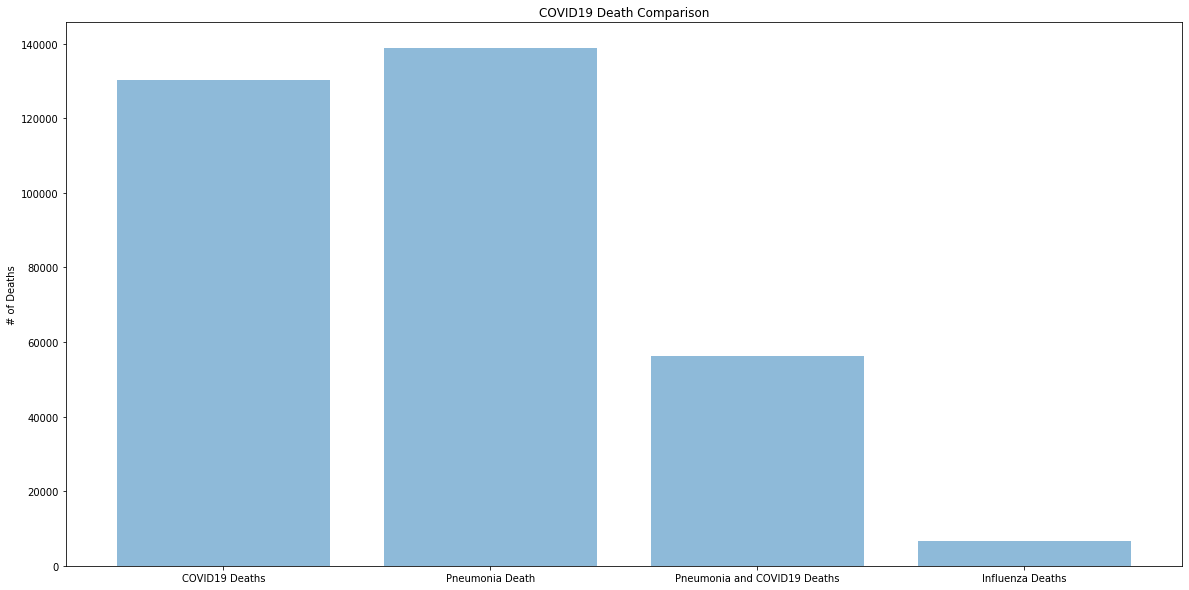

In [280]:
with PdfPages('COVID19_Bar.pdf') as pdf:
    plt.rcParams['figure.figsize'] = (20,10)
    plt.bar(y_axis, perf, alpha=0.5)
    plt.xticks(y_axis, obj)
    plt.ylabel('# of Deaths')
    plt.title('COVID19 Death Comparison')
    pdf.savefig()


In [282]:
#Created death sums from original csv
df = pd.read_csv('/Users/eyris/Documents/Resources/MeDaQuad_Info_EP/Provisional_COVID-19_Death_Counts.csv')

fig = go.Figure(data=go.Choropleth(    
    locations = df['States'], 
    z = df['COVID19 Deaths'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    autocolorscale = True,
    colorbar_title = "Deaths",
))

fig.update_layout(
    title_text = 'COVID19 Deaths by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()